In [65]:
import pandas as pd

#
# Population data to rows of region name, population in 2000, population in 2001, ..., population in 2022
#

# population 2012-2022
# encoding: currently transforms all ä's and ö's to ïŋ―
population = pd.read_csv('PKS_Vaestoennusteet_2013_2022.csv', delimiter=';', encoding='iso8859_10')

# subset for only helsinki's larger areas (suurpiiri)
hel = population[population['Kunta/City'].str.contains('Helsinki')]
hel = population[population['Alue/District'].str.contains('suurpiiri')]

# subset only Alue/District and populations per year
unnecessary_columns = ['Kunta/City', 'Aluetaso/Regional Level', 'Seutukarttakoodi/Map code', 'Ikïŋ―/Age']
hel = hel.drop(unnecessary_columns, axis=1)
# drop population before 2015
hel = hel.drop(hel.columns[1:16], axis=1)

# populations per year are strings, cast to int
def map_to_int(val):
    if val == '.': # missing values marked with .
        return None
    
    return int(val)

for i in range(15,23): # years 2000-2023
    year = '0'+ str(i) if i < 10 else str(i) 
    hel['20'+year] = hel['20' + year].map(map_to_int)

#sum populations per area (originally population per age group)
hel_per_area = hel.groupby('Alue/District').first()

hel_per_area.to_csv('.data/silver/past_population_clean.csv')

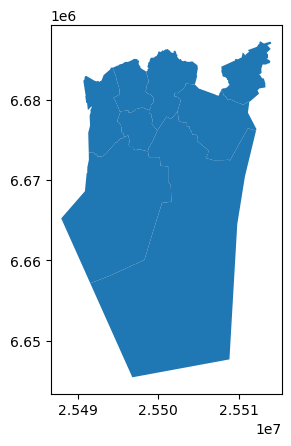

In [11]:
# geopandas for the regions
import geopandas as gpd 

# note: also shx file required for this to work!
greater_regions = gpd.read_file('./data/raw/suurpiirit_WFS_areas.shp')
plot = greater_regions.plot()